In [1]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline  

with open('Data/2015.tsv','r') as tsv:
    data = [line.strip().split('\t') for line in tsv]
    
col_names = data[0]
df = pd.DataFrame(data, columns=col_names)
df = df[1:]

#open code_sex.csv and convert it to a DataFrame
with open('Data/code_sex.csv','r') as csv:
    sex_descrip = [line.strip().split(',') for line in csv]

sex_header = sex_descrip[0]
df_sex = pd.DataFrame(sex_descrip, columns=sex_header)
df_sex = df_sex[1:]
indexed_df_sex = df_sex.set_index('Code')

#open code_body_part.csv and convert it to a DataFrame
with open('Data/code_body_part.csv','r') as csv:
    body_part_descrip = [line.strip().split(',') for line in csv]

body_part_header = body_part_descrip[0]
df_body_part = pd.DataFrame(body_part_descrip, columns=body_part_header)
df_body_part = df_body_part[1:]
indexed_df_body_part = df_body_part.set_index('Code')

#open code_diagnosis.csv and convert it to a DataFrame
with open('Data/code_diagnosis.csv','r') as csv:
    diagnosis_descrip = [line.strip().split(',') for line in csv]

diagnosis_header = diagnosis_descrip[0]
df_diagnosis = pd.DataFrame(diagnosis_descrip, columns=diagnosis_header)
df_diagnosis = df_diagnosis[1:]
indexed_df_diagnosis = df_diagnosis.set_index('Code')

#open code_disposition.csv and convert it to a DataFrame
with open('Data/code_disposition.csv','r') as csv:
    disposition_descrip = [line.strip().split(',') for line in csv]

disposition_header = disposition_descrip[0]
df_disposition = pd.DataFrame(disposition_descrip, columns=disposition_header)
df_disposition = df_disposition[1:]
indexed_df_disposition = df_disposition.set_index('Code')

#open code_fire.csv and convert it to a DataFrame
with open('Data/code_fire.csv','r') as csv:
    fire_descrip = [line.strip().split(',') for line in csv]

fire_header = fire_descrip[0]
df_fire = pd.DataFrame(fire_descrip, columns=fire_header)
df_fire = df_fire[1:]
indexed_df_fire = df_fire.set_index('Code')

#open code_locale.csv and convert it to a DataFrame
with open('Data/code_locale.csv','r') as csv:
    locale_descrip = [line.strip().split(',') for line in csv]

locale_header = locale_descrip[0]
df_locale = pd.DataFrame(locale_descrip, columns=locale_header)
df_locale = df_locale[1:]
indexed_df_locale = df_locale.set_index('Code')

#open code_product.csv and convert it to a DataFrame
with open('Data/code_product.csv','r') as csv:
    product_descrip = [line.strip().split(',',1) for line in csv]

product_header = product_descrip[0]
df_product = pd.DataFrame(product_descrip, columns=product_header)
df_product = df_product[1:]
indexed_df_product = df_product.set_index('Code')

#open code_race.csv and convert it to a DataFrame
with open('Data/code_race.csv','r') as csv:
    race_descrip = [line.strip().split(',') for line in csv]

race_header = race_descrip[0]
df_race = pd.DataFrame(race_descrip, columns=race_header)
df_race = df_race[1:]
indexed_df_race = df_race.set_index('Code')

#merge all the codes
df['sex_descrip']=df.sex.map(indexed_df_sex.Description)
df['body_part_descrip']=df.body_part.map(indexed_df_body_part.Description)
df['diag_descrip']=df.diag.map(indexed_df_diagnosis.Description)
df['disposition_descrip']=df.disposition.map(indexed_df_disposition.Description)
df['fire_descrip']=df.fmv.map(indexed_df_fire.Description)
df['locale_descrip']=df.location.map(indexed_df_locale.Description)
df['product1_descrip']=df.prod1.map(indexed_df_product.Description)
df['product2_descrip']=df.prod2.map(indexed_df_product.Description)
df['race_descrip']=df.race.map(indexed_df_race.Description)

#combine the 2 narr fields into 1
df['Notes'] = df['narr1'].map(str) + df['narr2'].map(str)

df1 = df[['CPSC Case #', 
         'trmt_date', 
         'psu', 
         'weight', 
         'age', 
         'sex_descrip', 
         'race_descrip',
         'body_part_descrip', 
         'diag_descrip', 
         'disposition_descrip', 
         'fire_descrip', 
         'locale_descrip', 
         'product1_descrip', 
         'product2_descrip', 
         'Notes']]

#convert numerical columns to numeric data type
df1 = df1.apply(lambda x: pd.to_numeric(x,errors="ignore"))

#convert 'trmt_date' column to datetime type
df1['trmt_date'] = df1['trmt_date'].apply(lambda x: pd.to_datetime(x,format='%m/%d/%Y'))

#remove quotation marks from product1_desrip field
df1['product1_descrip'] = df1['product1_descrip'].apply(lambda x: re.sub('"','',str(x)))

def textfind(dataframe, field, string):
    """ Takes dataframe, field (column in the dataframe), and a string to search
    Allow for use of regular expressions.
    Returns a dataframe of the records where the string is found"""
    import re
    a = [dataframe.loc[i] for i in dataframe.index \
         if re.search(string, dataframe[field][i])]
    return pd.DataFrame(a)
    
def notereader(dataframe):
    """ Takes a dataframe that contains the 'Notes' field and prints it out in a
    readable fashion.
    Returns a dictionary of Index (integer): Note (string) pairs"""
    output_dict ={}
    for i in dataframe.index:           
        output_dict[i] = dataframe.Notes[i]
        print ("INDEX", i,"\n", dataframe.Notes[i],"\n")
    return output_dict

pd.options.display.max_colwidth = 1000
pd.set_option('float_format', '{:.1f}'.format)

In [32]:
df1.dtypes

## Junk
This search returned 47 results, using the search term "rectum".

In [65]:
dfjunk = textfind(df1, 'Notes', '\sRECTUM\s(?!TO STOP|TO PUSH|NOTED|DX|S/P FALLING|WITH VERY)')[df1['age'] < 121]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [70]:
#dfjunk.groupby('sex_descrip')['age'].count().plot.bar()
len(dfjunk)

39

Males are almost three times more likely to suffer this type of injury, as evidenced by the percentages of the injuries affecting each sex.  
The mean age for these injuries for males and females is quite different, with mean age for male patients being more than double that of female patients. For females, 75% of the reported injuries occur in patients before their teens. The remaining 25% of cases are spread between the ages of 20 and 50. This implies that this behaviour in females is largely restricted to children doing what children do.  
In males, the cases reported show the behaviour starting in the teen years and peaking right under the age of 20. Unlike in the female population, the behaviour continues throughout the whole lifespan. Other peaks are seen in the thirties, fifties, and seventies with 75% of the cases reported in patients older than 20 years old.

,CPSC Case #,age,percentage
,count,mean,
sex_descrip,,,
FEMALE,11,19.7,26.8
MALE,30,38.2,73.2


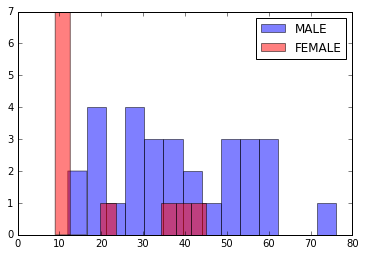

In [54]:
junk_M_plot = dfjunk[dfjunk.sex_descrip == 'MALE'].age
junk_F_plot =dfjunk[dfjunk.sex_descrip == 'FEMALE'].age
junk_m = plt.hist(junk_M_plot,alpha=0.5, bins = 14, color = 'blue',label='MALE')
junk_f = plt.hist(junk_F_plot,alpha=0.5, bins = 10,color = 'red',label='FEMALE')
plt.legend()
plt.show

junk_sort = {'CPSC Case #':['count'], 'age':['mean']}
junk_table = pd.DataFrame(dfjunk.groupby('sex_descrip').agg(junk_sort))
junk_table['percentage'] = junk_table['CPSC Case #'].apply(lambda x: 100*x/float(x.sum()))
junk_table[['age','percentage']]
junk_table

The top two products used by the patients to cause this injury are vibrators/sex toys, used in 26% of the cases (e.g. 55YOM W/FOREIGN BODY IN RECTUM 2/2 DILDO IN RECTUM X 2 DAYS THAT HE WASUNABLE TO GET OUT), and pens/pecils used 13% of the cases (e.g. 22 YO MALE PLACED A BINGO DAUBER INTO HIS RECTUM. DX FOREIGN BODY RECTUM B) Other categories include balls/spherical object used in 8% of the cases (e.g. 40 YR OLD MALE PUT BASEBALL UP RECTUM AND UNABLE TO REMOVE IT AND TAKENTO OR TO REMOVE), and bottles, also in 8% of the cases. Other notable objects are tools, brushes, and drugs (which are all related to smuggling, e.g. 20YOM HID PLASTIC BAGS OF MJ IN RECTUM WHEN ARRESTED & INGESTED THEM INJAIL TO AVOID MORE CHARGES. DX FB INGESTION, MJ INTOXICATION) used in 5% of the cases, respectively.

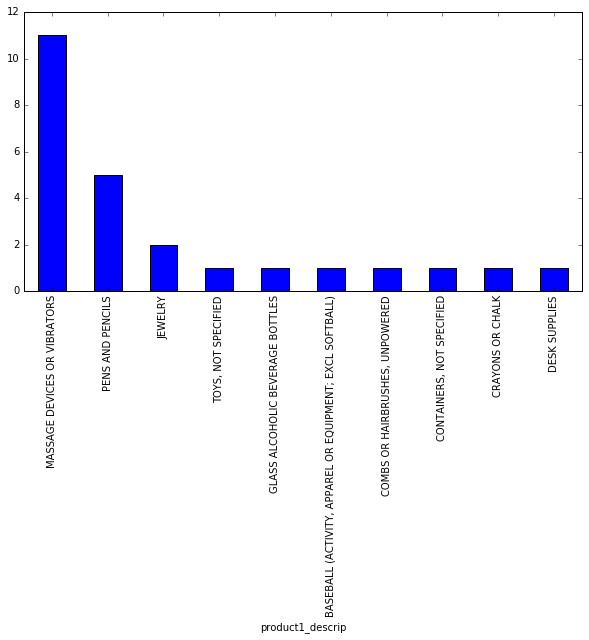

In [68]:
dfjunk.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(10,5))

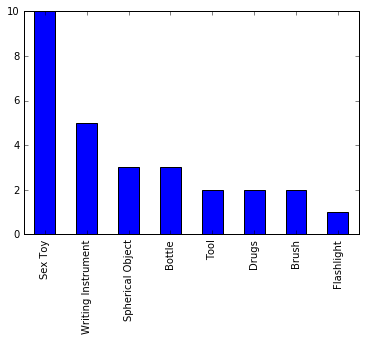

In [75]:
dfjunk_in = pd.Series({'Sex Toy' : textfind(dfjunk,'Notes','\sVIBRATOR\s|\sTOY\s|DILDO')['age'].count(),
             'Writing Instrument': textfind(dfjunk,'Notes','\sPENCIL\s|\sPEN\s|\sDAUBER\s')['age'].count(),
              'Flashlight': textfind(dfjunk,'Notes','\sFLASHLIGHT\s')['age'].count(),
              'Brush': textfind(dfjunk,'Notes','BRUSH')['age'].count(),
              'Spherical Object': textfind(dfjunk,'Notes','\sBEAD\s|\sMARBLE|BALL\s')['age'].count(),
              'Tool': textfind(dfjunk,'Notes','\sSCREWDRIVER\s|\sHAMMER\s')['age'].count(),
              'Bottle': textfind(dfjunk,'Notes','\sBOTTLE\s')['age'].count(),
              'Drugs': textfind(dfjunk,'Notes','\sMETHAMPHETAMINE\s|MJ')['age'].count()
             })

dfjunk_in.sort_values(ascending=False).plot.bar()

In [39]:
textfind(dfanger,'Notes','\sVIBRATOR\s|\sTOY\s|\sDILDO\s')

""


In [64]:
dfjunk

,CPSC Case #,trmt_date,psu,weight,age,sex_descrip,race_descrip,body_part_descrip,diag_descrip,disposition_descrip,fire_descrip,locale_descrip,product1_descrip,product2_descrip,Notes
5152,150407596,2015-03-26,91,15.1,21,FEMALE,WHITE,LOWER TRUNK,FOREIGN BODY,TREATED AND RELEASED,NO FIRE,UNKNOWN,PENS AND PENCILS,NaN,21YOF PSYCH PT PUT A PENCIL UP RECTUM TO MAKE BOWEL MOVEMENT TO GET GAUZE PT SWALLOWED TO COME OUT DX-RECTAL FB
6279,151007610,2015-09-09,93,15.8,36,FEMALE,WHITE,LOWER TRUNK,FOREIGN BODY,HOSPITALIZED,NO FIRE,HOME,MASSAGE DEVICES OR VIBRATORS,NaN,"36 YOF INSERTED VIBRATOR INTO RECTUM & IS UNABLE TO REMOVE IT.DX: FB RECTUM, HYPOKALEMIA."
14505,150726333,2015-07-07,89,74.9,43,MALE,WHITE,LOWER TRUNK,FOREIGN BODY,TREATED AND RELEASED,NO FIRE,HOME,FLASHLIGHTS OR BATTERY-POWERED LANTERNS,NaN,"43 YO M PT WAS USING A FLASHLIGHT UP HIS RECTUM TO STIMULATE A BOWELMOVEMENT, FLASHLIGHT GOT STUCK UP THERE DX FOREIGN BODY IN RECTUM"
20130,151003712,2015-09-18,8,5.7,11,FEMALE,WHITE,LOWER TRUNK,FOREIGN BODY,HOSPITALIZED,NO FIRE,PUBLIC,JEWELRY,PENS AND PENCILS,"11YOF PUT PLASTIC BEADS, A BROKEN PEN, & BROKEN GLASS IN HER RECTUM TOSELF-HARM IN ATTEMPT TO GET AWAY FROM GROUP HOME; RECTAL FOREIGN BODY"
43040,151027629,2015-09-11,8,5.7,11,FEMALE,WHITE,LOWER TRUNK,FOREIGN BODY,HOSPITALIZED,NO FIRE,PUBLIC,PENS AND PENCILS,OTHER CONTAINERS,"11YOF STOLE A PENCIL FROM COMMUNIAL PENCIL BOX AT ***, BROKE INTO PIECES PUTTING IN RECTUM TO HARM SELF;FB REMOVED"
52978,151023629,2015-10-02,5,37.7,53,MALE,WHITE,LOWER TRUNK,FOREIGN BODY,TREATED AND RELEASED,NO FIRE,HOME,MASSAGE DEVICES OR VIBRATORS,NaN,"53 YOM HAS A TOY STUCK IN RECTUM WHICH PARTNER PLACED.DX: ACUTE ABDOMINAL PX, RECTAL FB."
59796,150809407,2015-07-03,8,5.7,11,FEMALE,WHITE,LOWER TRUNK,FOREIGN BODY,TREATED AND RELEASED,NO FIRE,PUBLIC,DESK SUPPLIES,"""NAILS, SCREWS, CARPET TACKS OR THUMBTACKS""","11YOF PLACED PAPERCLIP, A SCREW OR ""METAL RODS"" IN RECTUM IN SELF HARMAT RESIDENTIAL TREATMENT CENTER; RECTAL FBS"
67712,151226931,2015-12-09,89,74.9,31,MALE,OTHER,LOWER TRUNK,FOREIGN BODY,HOSPITALIZED,NO FIRE,HOME,SCREWDRIVERS,NaN,31 YO M PER WIFE PT SAT DOWN ON A SCREWDRIVER AND IT WENT UP HIS RECTUMDX FOREIGN BODY RECTUM ADMIT
72360,150945262,2015-09-13,2,15.8,59,MALE,UNKNOWN,LOWER TRUNK,FOREIGN BODY,TREATED AND RELEASED,NO FIRE,HOME,PENS AND PENCILS,NaN,59YOM STATES HIS GIRLFRIEND INSERTED A PEN CAP IN HIS RECTUM DURIGN SEXNOW UNABLE TO GET IT OUT FB RECTUM
76575,150349338,2015-03-17,5,37.7,32,MALE,WHITE,LOWER TRUNK,FOREIGN BODY,TREATED AND RELEASED,NO FIRE,HOME,PAPER PRODUCTS,TAPES (WITH ADHESIVE SURFACES),"32 YOM PUT WINE CORK WRAPPED IN PAPER TOWELS, ELECTRICAL TAPE & ACONDOM INTO RECTUM & IT IS STUCK. DX: RECTAL FB."


# Emotional Injury
As people's judgement can be impaired by their emotional state, the data was analyzed to find which emotions are most mentioned in the 'Notes' field.  
## Happiness
Not surprisingly, no records were found to incude the words "happy", "happiness", or "glad". One record did include "not happy", but that was not included in the count for obvious reasons. 
## Sadness
Sadness returned 18 results, based on searching for "sad", "sadness", "depressed" or "unhappy". Records had to be filtered for the use of "depressed" to describe some injuries like "depressed skull", and records that indicated that the the patient was sad to be in the ER, which means that sadness was not the cause of the injury.  



In [9]:
dfsadness = textfind(df1, 'Notes', '\sSAD\s|\sSADNESS\s|\sUNHAPPY\s|(?<!SKULL|SCULL)\sDEPRESSED\s(?!SKULL|SCULL|FX|RIGHT|RSKULL)')[df1['age'] < 121]
len(dfsadness)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


18

Injuries related to sadness affected females a bit more than males, as evidenced by the percentages of the injuries affecting each sex.  
The mean age for these injuries was similar for males and females, being in the early thirties for both. When analyzed by age, a peak in injuries is seen in the teenage years for both sexes. This is the only observable pattern, which could be due to the relatively low number of data points or may be an indicator that sadness related injuries occur at a random rate across all ages beyond the teenage years.

,age,percentage
,mean,
sex_descrip,,
FEMALE,32.00,55.555556
MALE,34.75,44.444444


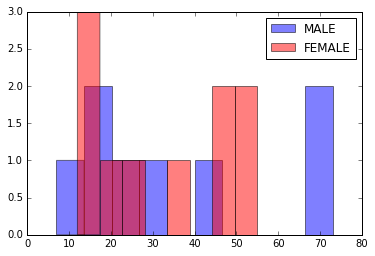

In [10]:
sadness_M_plot = dfsadness[dfsadness.sex_descrip == 'MALE'].age
sadness_F_plot =dfsadness[dfsadness.sex_descrip == 'FEMALE'].age
sadness_m = plt.hist(sadness_M_plot,alpha=0.5, bins = 10, color = 'blue',label='MALE')
sadness_f = plt.hist(sadness_F_plot,alpha=0.5, bins = 8,color = 'red',label='FEMALE')
plt.legend()
plt.show

sadness_sort = {'CPSC Case #':['count'], 'age':['mean']}
sadness_table = pd.DataFrame(dfsadness.groupby('sex_descrip').agg(sadness_sort))
sadness_table['percentage'] = sadness_table['CPSC Case #'].apply(lambda x: 100*x/float(x.sum()))
sadness_table[['age','percentage']]



The top three products involved in the injuries related to sadness are floors, knives, and walls. By looking at the data, in the case of floors and walls, this is due to many people being found laying on the floor after they have been injured, or injuring themselves by bumping into walls. This might indicate that the primary cause is lack of focus or distraction due to being depressed or sad. In this dataset the knofe injuries were evenly split between one due to distration, and one due to self-harm. 

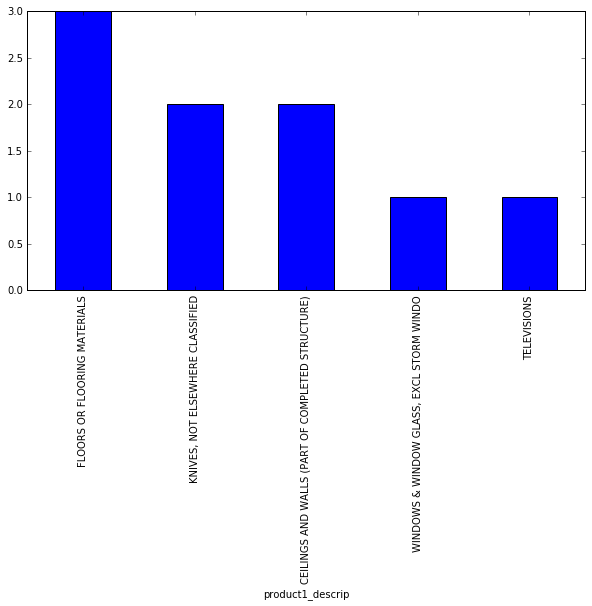

In [11]:
dfsadness.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(5).plot.bar(figsize=(10,5))

In [12]:
#dfsadness

## Excitement
Excitement returned 20 results, based on searching for "excited" or "excitement".





In [23]:
dfexcite = textfind(df1, 'Notes', '\sEXCITED\s|\sEXCITEMENT\s')[df1['age'] < 121]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Injuries related to excitement affected females slightly more than males, as evidenced by the percentages of the injuries affecting each sex. The mean age for these injuries was similar for males and females, being in the mid twenties for both. When analyzed by age, a peak in injuries is seen in children through ten years old and younger for both sexes. The prevalance of these injuries falls dramatically with age, with 75% of injuries reported in people 40 years old or younger. This may be an indication that people older that 40 are less excitable,  have less exciting lives, or have learned to curb their enthusiasm. 


,age,percentage
,mean,
sex_descrip,,
FEMALE,26.454545,55.0
MALE,26.222222,45.0


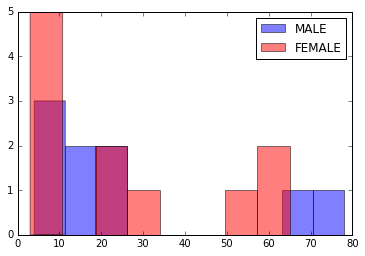

In [24]:
excite_M_plot = dfexcite[dfexcite.sex_descrip == 'MALE'].age
excite_F_plot =dfexcite[dfexcite.sex_descrip == 'FEMALE'].age
excite_m = plt.hist(excite_M_plot,alpha=0.5, bins = 10, color = 'blue',label='MALE')
excite_f = plt.hist(excite_F_plot,alpha=0.5, bins = 8,color = 'red',label='FEMALE')
plt.legend()
plt.show

excite_sort = {'CPSC Case #':['count'], 'age':['mean']}
excite_table = pd.DataFrame(dfexcite.groupby('sex_descrip').agg(excite_sort))
excite_table['percentage'] = excite_table['CPSC Case #'].apply(lambda x: 100*x/float(x.sum()))
#pd.set_option('float_format', '{:.1f}'.format)
excite_table[['age','percentage']]

In [25]:
#dfexcite.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(6).plot.bar(figsize=(10,5))

The data was analyzed to find out what was causing the patient to get excited at the time of their injury, and sorted to find the most caueses.  
Dogs are the mentioned in more than 30% of the cases. All of these incidents involved a dog getting excited and biting a person (e.g. 32YOF LAYING DOWN WITH HER DOG AND THE DOORBELL RANG THE DOG BECAME EXCITED AND JUMPED ONTO PTS FACE).  
Watching sports, swimming pools, and seeing family were each reported twice, or in 10% of the cases.

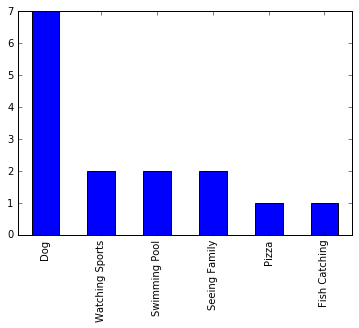

In [30]:
dfexcite_at = pd.Series({'Dog' : textfind(dfexcite,'Notes','\sDOG\s|\sDOGS\s')['age'].count(),
             'Swimming Pool': textfind(dfexcite,'Notes','\sPOOL')['age'].count(),
              'Watching Sports': textfind(dfexcite,'Notes','\sFIGHT\s|\sFOOTBALL\s')['age'].count(),
              'Pizza': textfind(dfexcite,'Notes','\sPIZZA\s')['age'].count(),
              'Fish Catching': textfind(dfexcite,'Notes','\sFISH\s')['age'].count(),
              'Seeing Family': textfind(dfexcite,'Notes','\sGRANDDAUGHTER\s|\sFAMILY\s(?!DOG)')['age'].count()
             })

dfexcite_at.sort_values(ascending=False).plot.bar()

## FEAR
Fear returned 36 results, based on searching for "fear", "afraid", "scared" or "frightened". 

In [13]:
dffear = textfind(df1, 'Notes', '\sFEAR\s|\sAFRAID\s|\sSCARED\s|\sFRIGHT')[df1['age'] < 121]
len(dffear)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


36

Injuries related to fear affected females 50% more than males, as evidenced by the percentages of the injuries affecting each sex.
The mean age for these injuries was similar for males and females, being in the mid twenties for both. When analyzed by age, a peak in injuries is seen in children through their teenage years for both sexes. Lower peaks show up in later decades, but are scattered and seem random.  This could be due to the relatively low number of data points or may be an indicator that fear-related injuries occur at a random rate across all ages beyond the teenage years.

,age,percentage
,mean,
sex_descrip,,
FEMALE,25.636364,61.111111
MALE,26.428571,38.888889


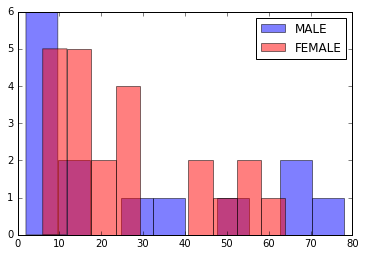

In [14]:
fear_M_plot = dffear[dffear.sex_descrip == 'MALE'].age
fear_F_plot = dffear[dffear.sex_descrip == 'FEMALE'].age
fear_m = plt.hist(fear_M_plot,alpha=0.5, bins = 10, color = 'blue',label='MALE')
fear_f = plt.hist(fear_F_plot,alpha=0.5, bins = 10,color = 'red',label='FEMALE')
plt.legend()
plt.show

fear_sort = {'CPSC Case #':['count'], 'age':['mean']}
fear_table = pd.DataFrame(dffear.groupby('sex_descrip').agg(fear_sort))
fear_table['percentage'] = fear_table['CPSC Case #'].apply(lambda x: 100*x/float(x.sum()))
fear_table[['age','percentage']]

The top three products involved in the injuries related to fear are beds/bedframes, horseback riding equipment, and a tie in third for biciycles, ceilings/walls, knives, and fireworks.  
The injuries related to beds are related to people getting startled in their beds then getting injured, or people falling out of them (e.g. "64 YO F C/O CHEST PAIN TODAY SAW A RAT IN HER ROOM GOT SCARED JUMPED OUT FROM HER BED HITTING CHEST ON DRESSING TABLE DX MSK PAIN" or "55 YR OLD FEMALE SCARED BY CAT AND FELL OUT OF BED CONTUSING KNEE").  
The injuries related to horseback riding equipment are all due to horses getting scared while someone was riding them, or after someine falls off of them (e.g. "27YOM AT THE PARK HORSEBACK RIDING WHEN A RATTLESNAKE SCARED HORSE,PT FELL FROM HORSE ON R HIP DX ACUTE R HIP CONTU,R THIGH CONTU,LUBMAR SPRAI"). It seems like the there is nothing to fear while horseriding, except the horse getting scared.  
Thirdly, injuries related to knives are due to people getting startled while they were cutting something with a knife. Injuries related to fireworks (perhaps as some form of cosmic karma) were both due to the dogs being afraid of fireworks then biting a person (e.g. "19YOF ARM ABRASION WHEN BITEN BY DOG WHEN SCARED OF FIREWORKS. TYPE M FIREWORKS. DX ARM ABRASION").   
After analyzing the data, it is clear that these cases are more accurately described as injuries due to people getting startled, or being around animals who did. This is supported by the randomness seen in the injury-rate by age beyond the teenage years.  
While horses are on top of the list of animals that caused injury by startling people or getting startled themselves, other notable ones include:
- Horses: 5 incidents
- Dogs: 5 incidents 
- Cats: 2 incidents
- Friends: 1 incident
- Cousins: 1 incident
- Dragon flies: 1 incident (e.g. "6YF JUMPING ON TRAMPOLINE, GOT SCARED BY DRAGON FLY&FELL OFF LANDING ONTO SHOULDER>>HUMRUS FX"
- Fake Spider: 1 incident (e.g. "6YOF-PT FELL BACKWARDS INTO A GLASS DOOR AFTER BEING AFRAID OF A FAKESPIDER. GLASS BROKE BUT TO BUTTOCKS. DX- LACERATION TO LEFT BUTTOCKS")


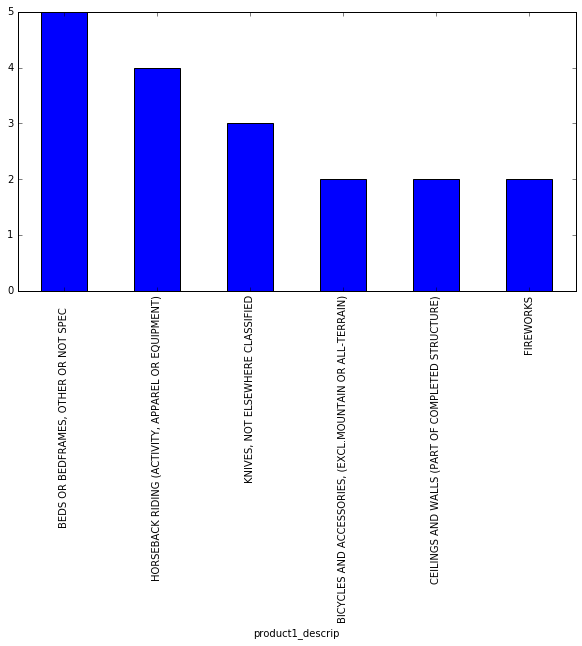

In [15]:
dffear.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(6).plot.bar(figsize=(10,5))

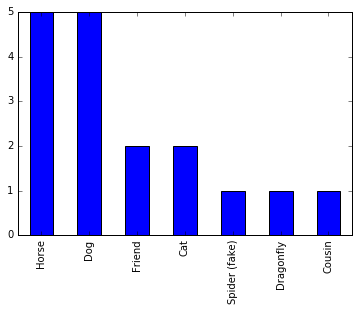

In [16]:
dffear_at = pd.Series({'Spider (fake)' : textfind(dffear,'Notes','SPIDER')['age'].count(),
             'Horse': textfind(dffear,'Notes','\sHORSE|\sPONY\s')['age'].count(),
              'Dog': textfind(dffear,'Notes','\sDOG\s')['age'].count(),
              'Cat': textfind(dffear,'Notes','\sCAT')['age'].count(),
              'Friend': textfind(dffear,'Notes','\sFRIEND\s|\sFRIENDS\s')['age'].count(),
              'Dragonfly': textfind(dffear,'Notes','\sDRAGONFLY\s|\sDRAGON FLY')['age'].count(),
              'Cousin': textfind(dffear,'Notes','\sCOUSIN\s|\sCOUSINS\s')['age'].count()
             })


dffear_at.sort_values(ascending=False).plot.bar()


## Anger

Anger returned 680 results, based on searching for "angry", "anger", "mad", "upset" or "frustrated". This is by far the emotion with the highest number of injuries related to it. Frustration was separated from anger as a separate emotion at the beginning of the analysis. However, after reading through the cases, the similarity between the two was high. Particularly in the presence and prevalence of wall-punching behaviour in both categories. 

In [17]:
dfanger = textfind(df1, 'Notes', '\sANGRY\s|\sANGER\s|\sMAD\s|FRUSTRATED|UPSET')[df1['age'] < 121]
len(dfanger)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


837

The male of the species is more than twice as likely to injure himself due to anger than the female, as evidenced by the percentages of the injuries affecting each sex. The mean age for these injuries was similar for males and females, being in the mid twenties for both. When analyzed by age, a peak in injuries is seen in the teenage years for both sexes. Beyond that, a steady decline in injuries is seen as both males and females age.  
This could indicate that as people get older they get wiser and are less prone to anger, or that people find ways to channel their anger in a way that does not injure them.

,age,percentage
,mean,
sex_descrip,,
FEMALE,24.003891,30.704898
MALE,23.270690,69.295102


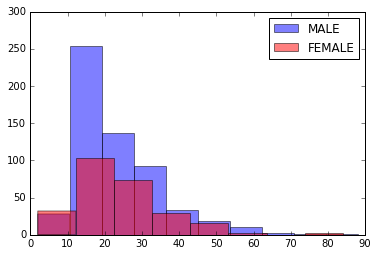

In [18]:
anger_M_plot = dfanger[dfanger.sex_descrip == 'MALE'].age
anger_F_plot =dfanger[dfanger.sex_descrip == 'FEMALE'].age
anger_m = plt.hist(anger_M_plot,alpha=0.5, bins = 10, color = 'blue',label='MALE')
anger_f = plt.hist(anger_F_plot,alpha=0.5, bins = 8,color = 'red',label='FEMALE')
plt.legend()
plt.show

anger_sort = {'CPSC Case #':['count'], 'age':['mean']}
anger_table = pd.DataFrame(dfanger.groupby('sex_descrip').agg(anger_sort))
anger_table['percentage'] = anger_table['CPSC Case #'].apply(lambda x: 100*x/float(x.sum()))
anger_table[['age','percentage']]

The data was analyzed to find out whom the patient was angry with at the time of their injury, and sorted to find the most common people.  
Surprisingly, mothers top the list, with many people (average age of 14.3 years) hurting themselves due to being angry at their mothers. (e.g. 17 YOM HAD A FIGHT WITH BROTHER, MOM TOLD HIM TO LEAVE UNTIL HE "COOLEDOFF" - TRIED TO GET IN HOUSE, GOT MAD ,PUNCHED WINDOW. DX; HAND LAC).  
Coming in a close second is 'partner' which in this analysis is used to indicate a romantic partner. Siblings come in third, and fathers a distant fourth.  
It seems couterintuitive that the people thought to be closest to us are the ones that make us crazy enough to hurt ourselves. It seems like the intensity of the emotional connection, not necessarily whether it is positive or negative, is what predicts the likelihood of injury.

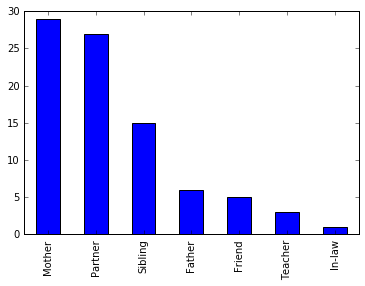

In [19]:
dfanger_at = pd.Series({'Mother' : textfind(dfanger,'Notes','\sMOM\s|\sMOTHER\s')['age'].count(),
             'Father': textfind(dfanger,'Notes','\sDAD\s|\sFATHER\s')['age'].count(),
              'Sibling': textfind(dfanger,'Notes','\sBROTHER\s|\sSISTER\s|\sBRO\s|\sSIS\s')['age'].count(),
              'Partner': textfind(dfanger,'Notes','\sGF\s|\sGIRLFRIEND\s|\sWIFE\s|\sHUSBAND\s|\sBOYFRIEND\s|\sBF\s')['age'].count(),
              'Friend': textfind(dfanger,'Notes','\sFRIEND\s')['age'].count(),
              'Teacher': textfind(dfanger,'Notes','\sTEACHER\s')['age'].count(),
              'In-law': textfind(dfanger,'Notes','\sIN LAW\s|\sIN LAWS\s|\sIN-LAW\s|\sIN-LAWS\s')['age'].count()
             })

dfanger_at.sort_values(ascending=False).plot.bar()

One of the interesting observations on the the anger dataset, is the prevalence of people hurting themselves by punching things, mainly walls. This was exhibited in a remarkable 65% of the cases where anger was involved. As a point of comparison, kicking was exhibited in around 3% of the cases. The text search was carefully performed to exclude records of people getting punched or kicked, as opposed to doing the punching or kicking themselves. 
A deeper analysis of the punching behaviour was performed to try to understand it better. 

In [20]:
dfpunch = textfind(dfanger,'Notes','(?<!WAS|GOT|GET)\sPUNCHED\s(?!BY\s|IN)|\sPUNCH\s(?!TO)')
dfkick = textfind(dfanger,'Notes','(?<!WAS|GOT|GET)\sKICKED\s(?!BY\s|IN)|\sKICK\s(?!TO)')
# len(dfkick)/len(dfanger)
# len(dfpunch)/len(dfanger)

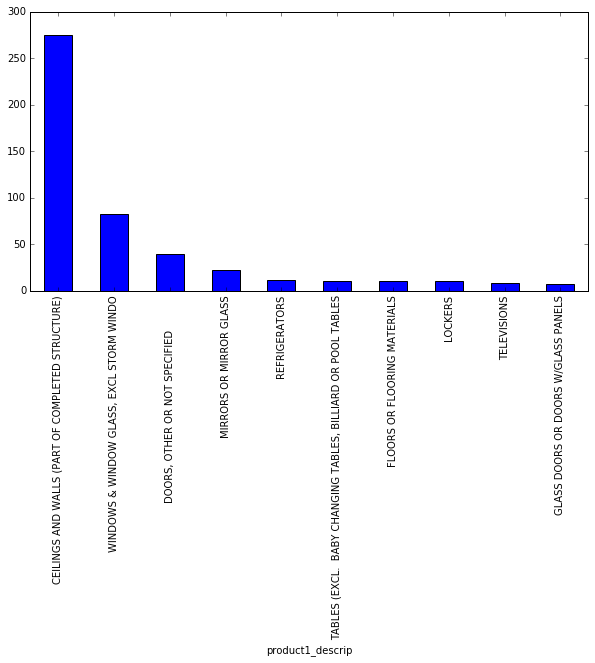

In [21]:
# dfpunch.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(10)
# dfkick.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(10)
#len(dfkick)
#notereader(dfpunch)
dfpunch.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(10,5))

,age,percentage
,mean,
sex_descrip,,
FEMALE,24.815789,27.992634
MALE,23.468031,72.007366


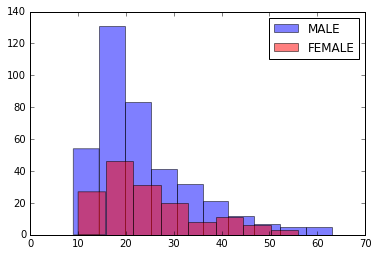

In [22]:
punch_M_plot = dfpunch[dfpunch.sex_descrip == 'MALE'].age
punch_F_plot =dfpunch[dfpunch.sex_descrip == 'FEMALE'].age
punch_m = plt.hist(punch_M_plot,alpha=0.5, bins = 10, color = 'blue',label='MALE')
punch_f = plt.hist(punch_F_plot,alpha=0.5, bins = 8,color = 'red',label='FEMALE')
plt.legend()
plt.show

punch_sort = {'CPSC Case #':['count'], 'age':['mean']}
punch_table = pd.DataFrame(dfpunch.groupby('sex_descrip').agg(punch_sort))
punch_table['percentage'] = punch_table['CPSC Case #'].apply(lambda x: 100*x/float(x.sum()))
punch_table[['age','percentage']]

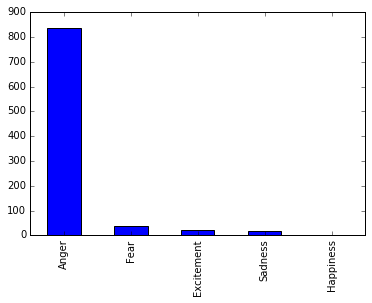

In [31]:
dfemotions = pd.Series({'Fear' : len(dffear),
             'Excitement': len(dfexcite),
              'Sadness': len(dfsadness),
              'Happiness': 0,
              'Anger': len(dfanger)
             })


dfemotions.sort_values(ascending=False).plot.bar()

In [80]:
dfcensus = pd.read_csv('Data/census.csv',header = 2)

In [81]:
dfcensus

,Age,Male,Female
0,0,0.63%,0.60%
1,1,0.63%,0.60%
2,2,0.63%,0.60%
3,3,0.63%,0.60%
4,4,0.64%,0.61%
5,5,0.64%,0.61%
6,6,0.64%,0.61%
7,7,0.66%,0.63%
8,8,0.66%,0.63%
9,9,0.66%,0.63%


In [116]:
M_Injuries = 100*pd.Series(df1[df.sex_descrip == 'MALE'].groupby('age')['age'].count())/len(df1)
F_injuries = 100*pd.Series(df1[df.sex_descrip == 'FEMALE'].groupby('age')['age'].count())/len(df1)
dfinjuries = pd.DataFrame(['M_injuries'])
dfinjuries

,0
0,M_injuries


In [109]:
merged = dfcensus.join(male_injuries,female_injuries)
#merged = merged.join(female_injuries)

KeyError: '[  2.22761181e-03   1.40506615e+00   1.17200226e+00   9.40052182e-01\n   8.76843697e-01   8.56238288e-01   8.21153402e-01   8.12799857e-01\n   8.49277001e-01   8.76008342e-01   8.93550785e-01   9.31420186e-01\n   9.29749477e-01   9.37546119e-01   8.78514406e-01   7.84676258e-01\n   6.74687926e-01   5.79735972e-01   5.13742973e-01   5.15970584e-01\n   4.92580660e-01   4.69747639e-01   4.65013964e-01   4.76708926e-01\n   4.65849319e-01   4.59166483e-01   4.78101184e-01   4.28815273e-01\n   4.38561074e-01   4.30485981e-01   4.27979918e-01   4.48585327e-01\n   4.04033091e-01   4.35498108e-01   4.11551281e-01   3.86769100e-01\n   3.71732720e-01   3.71175817e-01   3.51684214e-01   3.41103058e-01\n   3.24674421e-01   3.39432349e-01   3.47785893e-01   3.68391302e-01\n   3.75909492e-01   3.55304083e-01   3.78694007e-01   3.72289623e-01\n   3.74517235e-01   3.99299416e-01   4.19626374e-01   4.14892699e-01\n   4.22689340e-01   4.16841859e-01   4.17955665e-01   4.12386635e-01\n   3.87604454e-01   3.87604454e-01   3.62822273e-01   3.67277496e-01\n   3.76744847e-01   3.61708467e-01   3.52241117e-01   3.44722927e-01\n   3.36369383e-01   3.25231324e-01   3.48621248e-01   3.58367049e-01\n   2.78173024e-01   2.84855860e-01   2.94880113e-01   3.18826940e-01\n   2.84855860e-01   2.80400636e-01   2.85969665e-01   2.91817146e-01\n   2.93209404e-01   2.95993919e-01   2.80957539e-01   2.91817146e-01\n   3.02119851e-01   3.01841400e-01   3.10751847e-01   3.14650167e-01\n   3.19105391e-01   3.03233657e-01   3.06018172e-01   3.15763973e-01\n   2.80122185e-01   2.81514442e-01   2.54504649e-01   2.15242991e-01\n   1.62058759e-01   1.52312957e-01   1.06646915e-01   8.99398266e-02\n   6.04239702e-02   4.17677213e-02   3.11865653e-02   2.61744387e-02\n   1.08596076e-02   8.35354427e-03   3.34141771e-03   2.50606328e-03\n   2.78451476e-04   2.78451476e-04   5.56902951e-04   7.12835778e-02\n   5.54118437e-02   5.31842318e-02   5.81963584e-02   6.68283542e-02\n   9.18889870e-02   9.66226621e-02   1.12772848e-01   1.09152978e-01\n   1.11380590e-01   1.20569489e-01   1.41453350e-01   1.11380590e-01\n   1.29201485e-01   1.33656708e-01   1.23075552e-01   1.39782641e-01\n   1.36441223e-01   1.29479936e-01   1.40617995e-01   1.38668835e-01\n   1.35327417e-01   1.29201485e-01] not in index'

In [105]:
merged

,Age,Male,Female,M_injury,age
0,0,0.63%,0.60%,0.0,0.0
1,1,0.63%,0.60%,nan,nan
2,2,0.63%,0.60%,1.9,1.4
3,3,0.63%,0.60%,1.7,1.2
4,4,0.64%,0.61%,1.4,0.9
5,5,0.64%,0.61%,1.3,0.9
6,6,0.64%,0.61%,1.2,0.9
7,7,0.66%,0.63%,1.2,0.8
8,8,0.66%,0.63%,1.1,0.8
9,9,0.66%,0.63%,1.2,0.8
